In [19]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import itertools
import plotly.graph_objects as go

from function_splitting import *
from functions_voronoi import voronoi_finite_polygons_2d, voronoi_polygons

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
INPUT_WIDTH = 800
INPUT_HEIGHT = 400

in_points = np.array([[x, y] for x in range(INPUT_WIDTH) for y in range(INPUT_HEIGHT)])
in_points.shape

(320000, 2)

In [21]:
N_points = 5

kmeans = KMeans(n_clusters=N_points, random_state=0)
clusters = kmeans.fit_predict(in_points)
new_points = np.array([np.mean(in_points[clusters == curr], axis=0) for curr in set(clusters)])
new_points += np.array([[x_r, y_r] for x_r,y_r in zip(np.random.randint(N_points, size=N_points), 
                                                      np.random.random(N_points)+np.random.randint(N_points, size=N_points))])
new_points.shape

(5, 2)

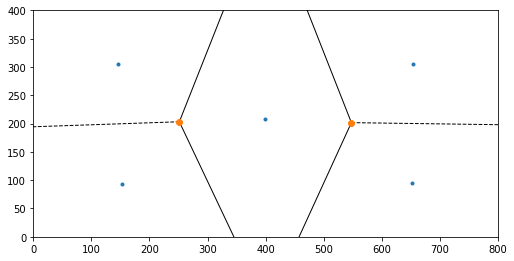

In [22]:
vor = Voronoi(new_points)

fig, ax = plt.subplots()
fig = voronoi_plot_2d(vor, ax, show_vertices=True)
ax.set_xlim((0, INPUT_WIDTH))
ax.set_ylim((0, INPUT_HEIGHT))
fig.set_size_inches(INPUT_WIDTH/96.0, INPUT_HEIGHT/96.0)

In [23]:
polygons = voronoi_polygons(new_points)
x_polygs, y_polygs = form_x_y_polygons(polygons)

fig = go.Figure(go.Scatter(x=x_polygs, y=y_polygs, mode='lines+markers'))
fig.add_trace(go.Scatter(x=[0, 0, INPUT_WIDTH, INPUT_WIDTH, 0], 
           y=[0, INPUT_HEIGHT, INPUT_HEIGHT, 0, 0], mode='lines+markers'))
# fig.update_layout(yaxis_range=[0, INPUT_HEIGHT], xaxis_range=[0, INPUT_WIDTH])
fig.show()

In [75]:
def get_new_polygon(polyg, x1, x2, y1, y2):
    A, B, C, D = (x1, y1), (x1, y2), (x2, y2), (x2, y1)
    
    x_in = np.logical_or(polyg[:, 0]<x1, polyg[:, 0]>x2)
    y_in = np.logical_or(polyg[:, 1]<y1, polyg[:, 0]>y2)
    
    if sum(x_in+y_in) == 0:  # full polygon inside area
        return polyg

    new_polyg = []
    for vector in zip(polyg, np.vstack((polyg, polyg[0]))[1:]):
        outside_vector = [is_outside(vec, x1, x2, y1, y2) for vec in vector]
        crossed = False
        
        if sum(outside_vector) == 2:
            continue
        else:
            for line in zip([A, B, C, D], [B, C, D, A]):  
                crossed = is_segments_intersect(np.array(vector), np.array(line))
                if crossed:
                    print('\n', vector)
                    intersected_line = line_intersection(vector, line)
                    
                    if outside_vector[0]:
                        new_polyg.append(intersected_line)
                        new_polyg.append(vector[1])
                    else:
                        new_polyg.append(vector[0])
                        new_polyg.append(intersected_line)
    return new_polyg


def is_outside(vec, x1, x2, y1, y2):
    return vec[0]<x1 or vec[0]>x2 or vec[1]<y1 or vec[1]>y2
        

x0, x1 = (0, INPUT_WIDTH)
y0, y1 = (0, INPUT_HEIGHT)

polyg = polygons[1]
print(polyg)
get_new_polygon(polyg, x0, x1, y0, y1)

[[  404.15430097 -1244.1922386 ]
 [  402.29300279  -123.63672671]
 [  251.4153851    203.15975086]
 [ -868.44832232   163.74660021]]

 (array([ 402.29300279, -123.63672671]), array([251.4153851 , 203.15975086]))

 (array([251.4153851 , 203.15975086]), array([-868.44832232,  163.74660021]))


[(345.2115589438311, 0.0),
 array([251.4153851 , 203.15975086]),
 array([251.4153851 , 203.15975086]),
 (-0.0, 194.31128797614736)]

In [76]:
def crop_axis(polygons, range_x, range_y):
    x1, x2, = range_x
    y1, y2 = range_y
        
    new_polygons = [get_new_polygon(polyg, x1, x2, y1, y2) for polyg in polygons]
    return new_polygons


polygons = voronoi_polygons(new_points)
cropped_polygons = crop_axis(polygons, range_x=(0, INPUT_WIDTH), range_y=(0, INPUT_HEIGHT))
cropped_polygons


 (array([399.58162771, 587.28581854]), array([547.42244985, 201.60828728]))

 (array([547.42244985, 201.60828728]), array([1667.86413655,  185.52890997]))

 (array([ 402.29300279, -123.63672671]), array([251.4153851 , 203.15975086]))

 (array([251.4153851 , 203.15975086]), array([-868.44832232,  163.74660021]))

 (array([1667.86413655,  185.52890997]), array([547.42244985, 201.60828728]))

 (array([547.42244985, 201.60828728]), array([ 402.29300279, -123.63672671]))

 (array([-868.44832232,  163.74660021]), array([251.4153851 , 203.15975086]))

 (array([251.4153851 , 203.15975086]), array([399.58162771, 587.28581854]))

 (array([ 402.29300279, -123.63672671]), array([251.4153851 , 203.15975086]))

 (array([251.4153851 , 203.15975086]), array([399.58162771, 587.28581854]))

 (array([399.58162771, 587.28581854]), array([547.42244985, 201.60828728]))

 (array([547.42244985, 201.60828728]), array([ 402.29300279, -123.63672671]))


[[(471.3734411940456, 400.0),
  array([547.42244985, 201.60828728]),
  array([547.42244985, 201.60828728]),
  (800.0, 197.98356518983442)],
 [(345.2115589438311, 0.0),
  array([251.4153851 , 203.15975086]),
  array([251.4153851 , 203.15975086]),
  (-0.0, 194.31128797614736)],
 [(800.0, 197.98356518983442),
  array([547.42244985, 201.60828728]),
  array([547.42244985, 201.60828728]),
  (457.4616572291054, 0.0)],
 [(0.0, 194.31128797614736),
  array([251.4153851 , 203.15975086]),
  array([251.4153851 , 203.15975086]),
  (327.3411880186484, 400.00000000000006)],
 [(345.2115589438311, 0.0),
  array([251.4153851 , 203.15975086]),
  array([251.4153851 , 203.15975086]),
  (327.3411880186484, 400.00000000000006),
  (471.3734411940456, 400.0),
  array([547.42244985, 201.60828728]),
  array([547.42244985, 201.60828728]),
  (457.4616572291054, 0.0)]]

In [77]:
x_polygs, y_polygs = form_x_y_polygons(cropped_polygons)

fig = go.Figure(go.Scatter(x=x_polygs, y=y_polygs, mode='lines+markers'))
fig.update_layout(yaxis_range=[0, INPUT_HEIGHT], xaxis_range=[0, INPUT_WIDTH])
fig.show()

TypeError: list indices must be integers or slices, not tuple